/tmp/ipykernel_14674/3538109445.py:48: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_data(df, column, df_cleaned[filter_outliers])


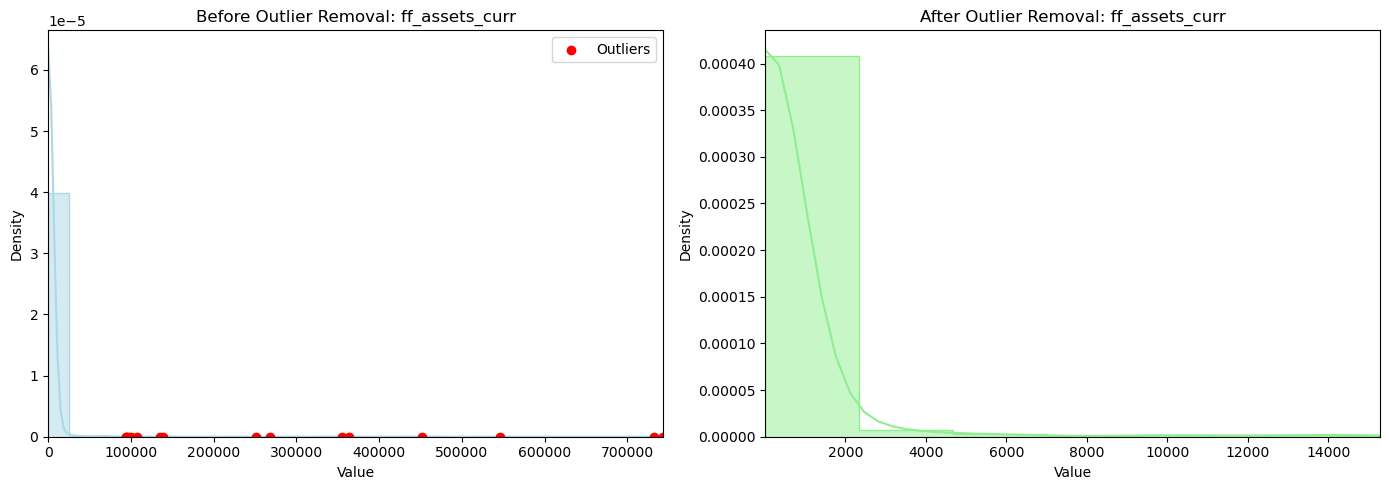

/tmp/ipykernel_14674/3538109445.py:47: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleaned = df_cleaned[filter_outliers]
/tmp/ipykernel_14674/3538109445.py:48: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_data(df, column, df_cleaned[filter_outliers])


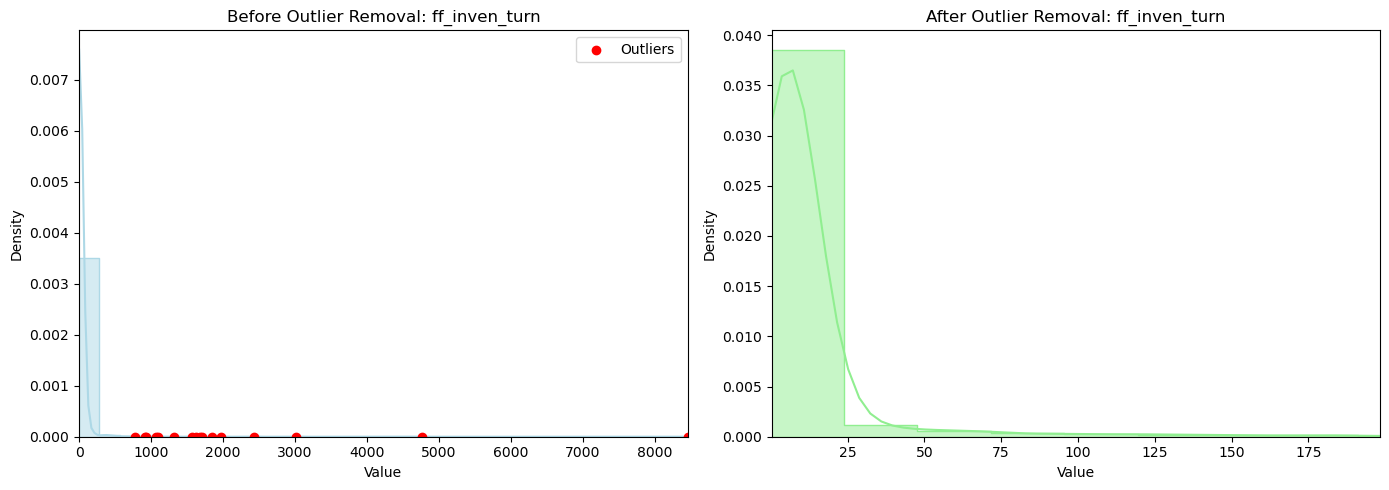

/tmp/ipykernel_14674/3538109445.py:47: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleaned = df_cleaned[filter_outliers]
/tmp/ipykernel_14674/3538109445.py:48: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_data(df, column, df_cleaned[filter_outliers])


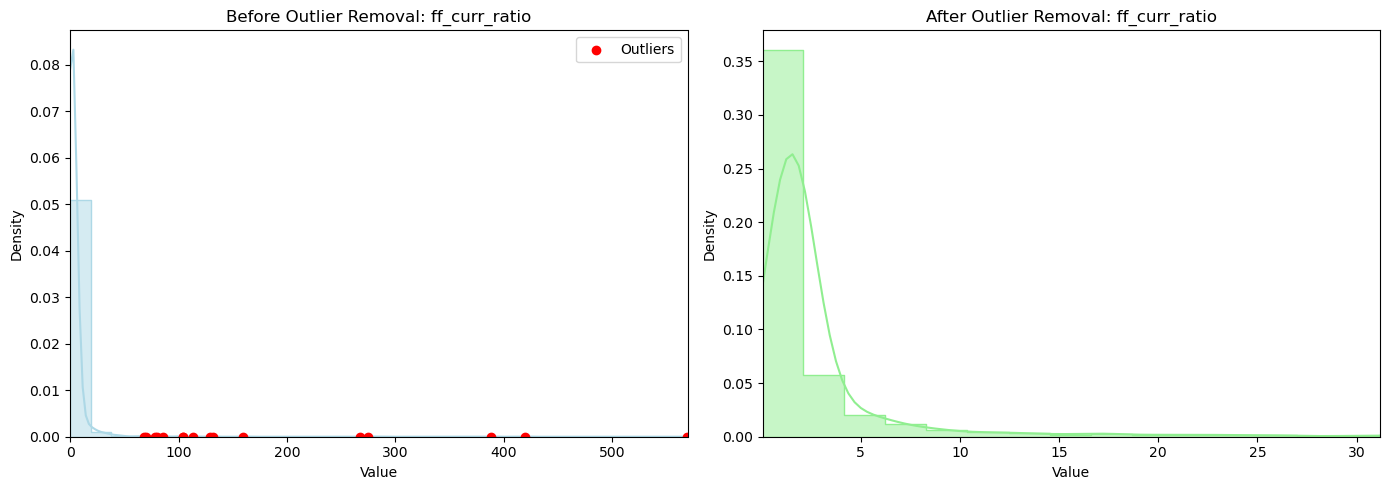

/tmp/ipykernel_14674/3538109445.py:47: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleaned = df_cleaned[filter_outliers]
/tmp/ipykernel_14674/3538109445.py:48: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_data(df, column, df_cleaned[filter_outliers])


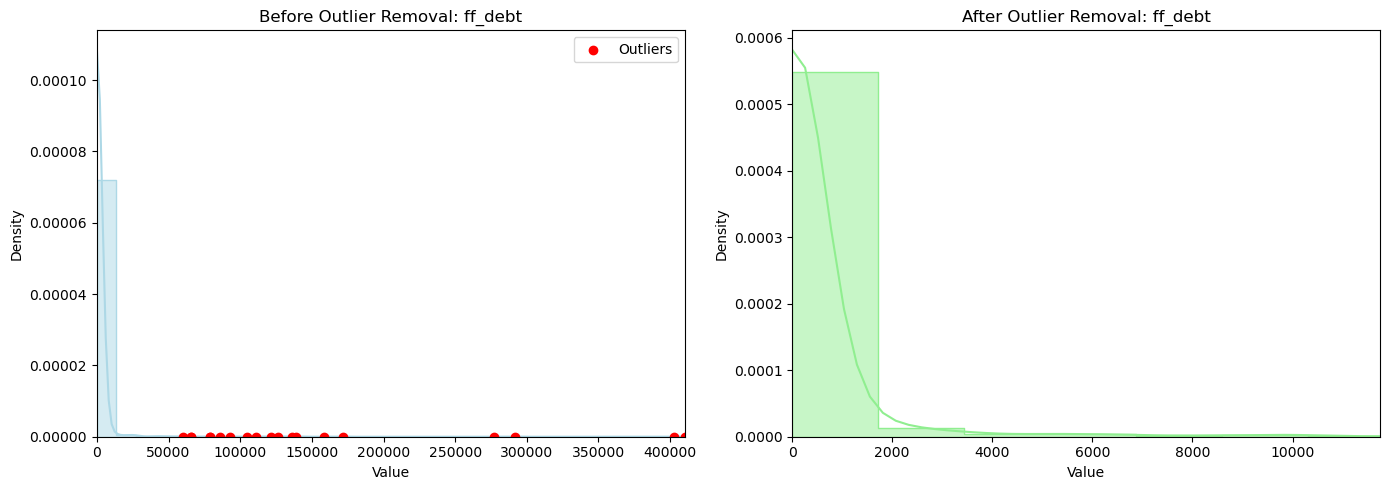

/tmp/ipykernel_14674/3538109445.py:47: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleaned = df_cleaned[filter_outliers]
/tmp/ipykernel_14674/3538109445.py:48: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_data(df, column, df_cleaned[filter_outliers])


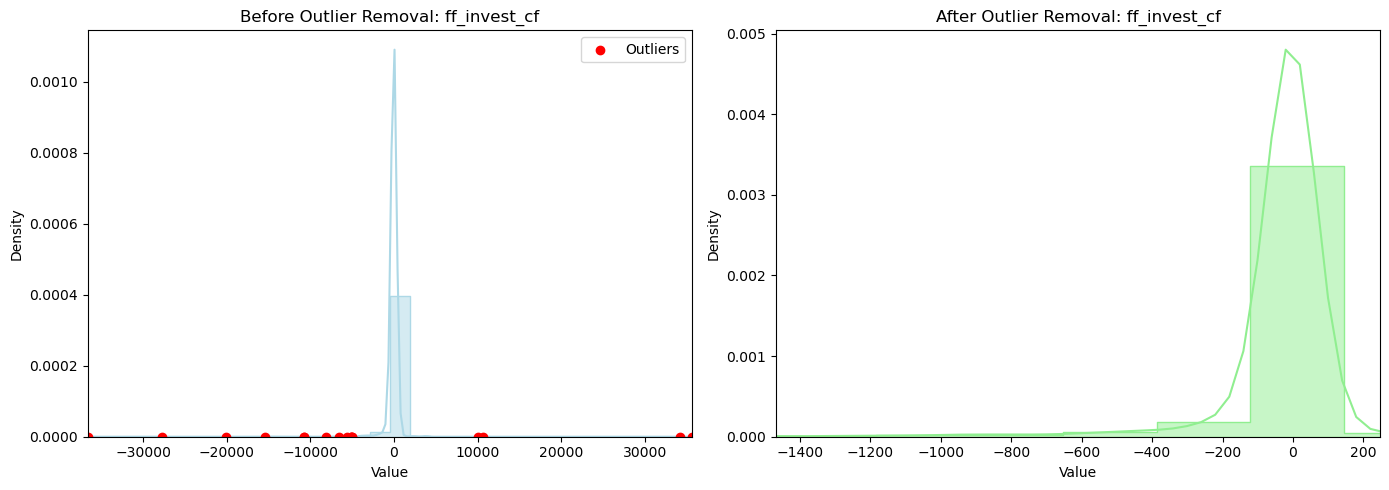

/tmp/ipykernel_14674/3538109445.py:47: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleaned = df_cleaned[filter_outliers]
/tmp/ipykernel_14674/3538109445.py:48: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_data(df, column, df_cleaned[filter_outliers])


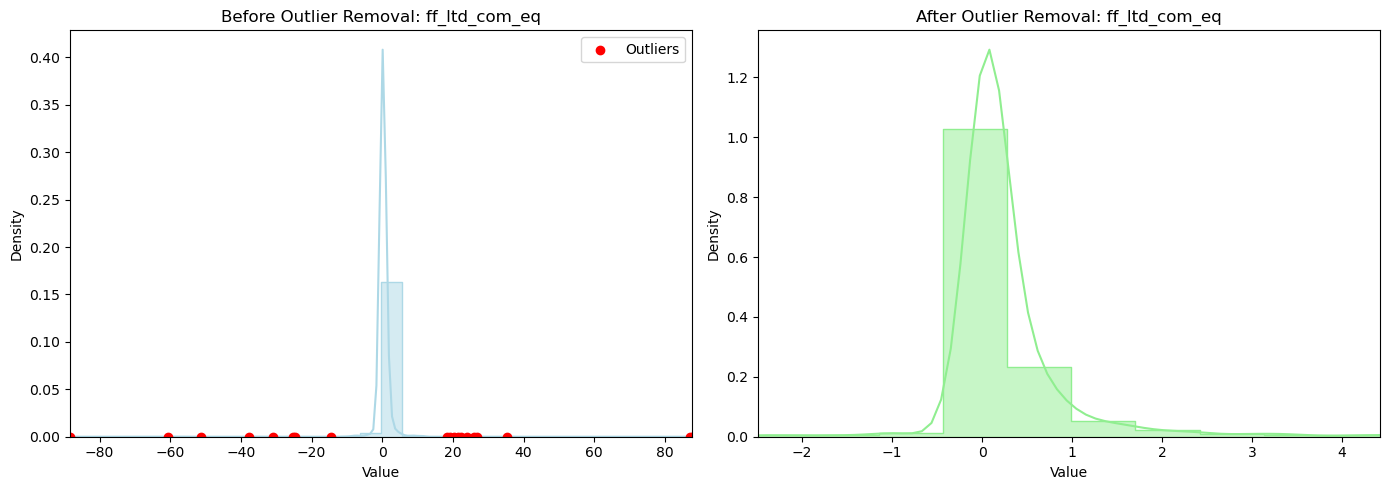

/tmp/ipykernel_14674/3538109445.py:47: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleaned = df_cleaned[filter_outliers]
/tmp/ipykernel_14674/3538109445.py:48: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_data(df, column, df_cleaned[filter_outliers])


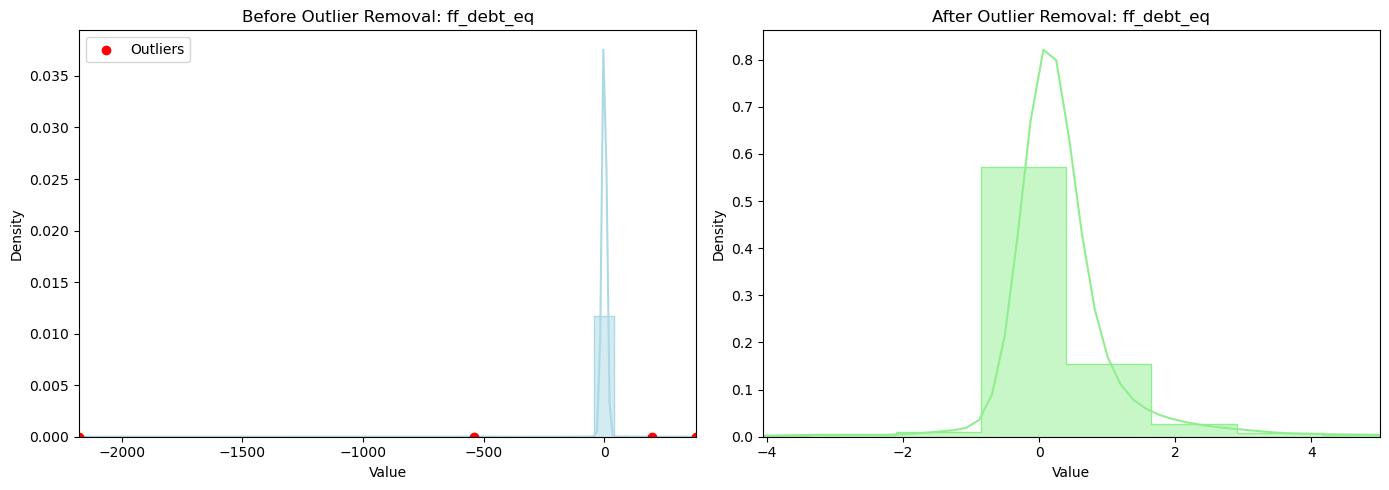

/tmp/ipykernel_14674/3538109445.py:47: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleaned = df_cleaned[filter_outliers]
/tmp/ipykernel_14674/3538109445.py:48: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_data(df, column, df_cleaned[filter_outliers])


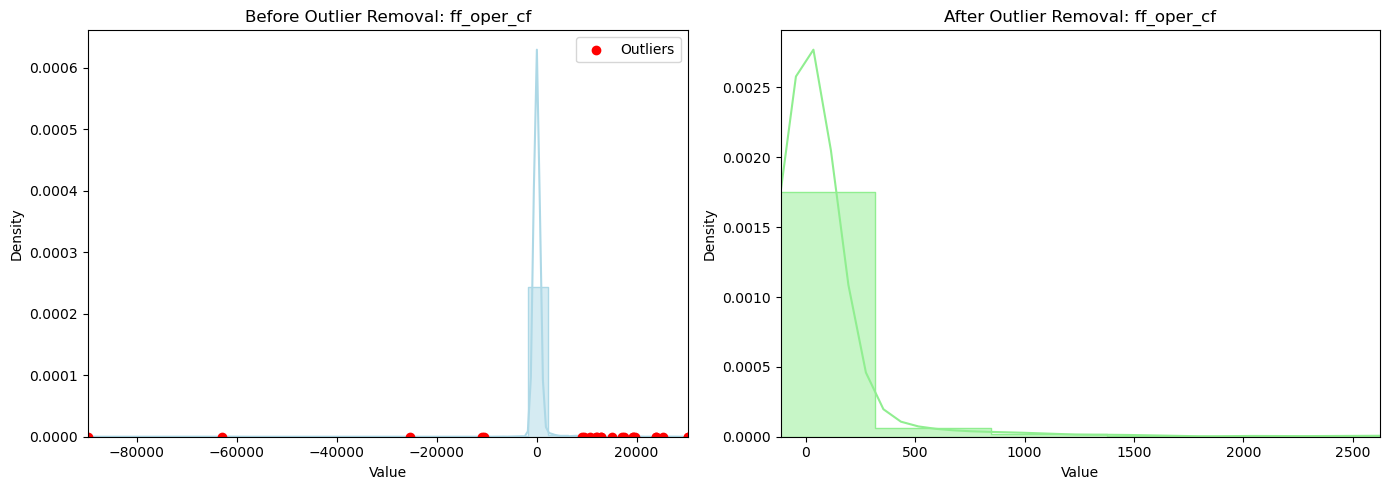

/tmp/ipykernel_14674/3538109445.py:47: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleaned = df_cleaned[filter_outliers]
/tmp/ipykernel_14674/3538109445.py:48: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_data(df, column, df_cleaned[filter_outliers])


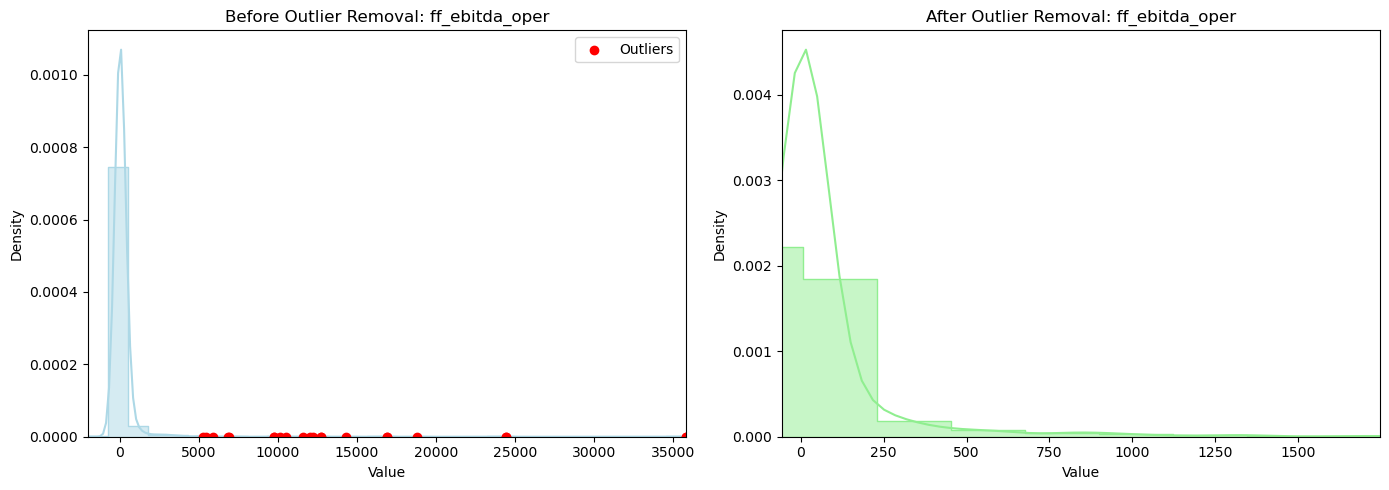

/tmp/ipykernel_14674/3538109445.py:47: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleaned = df_cleaned[filter_outliers]
/tmp/ipykernel_14674/3538109445.py:48: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_data(df, column, df_cleaned[filter_outliers])


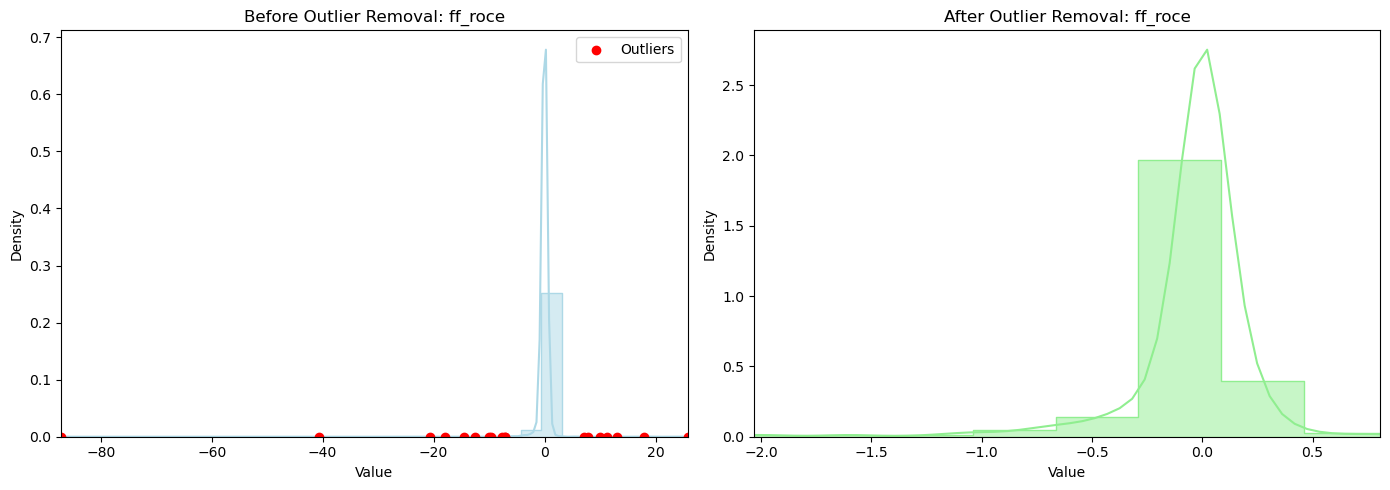

/tmp/ipykernel_14674/3538109445.py:47: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleaned = df_cleaned[filter_outliers]
/tmp/ipykernel_14674/3538109445.py:48: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_data(df, column, df_cleaned[filter_outliers])


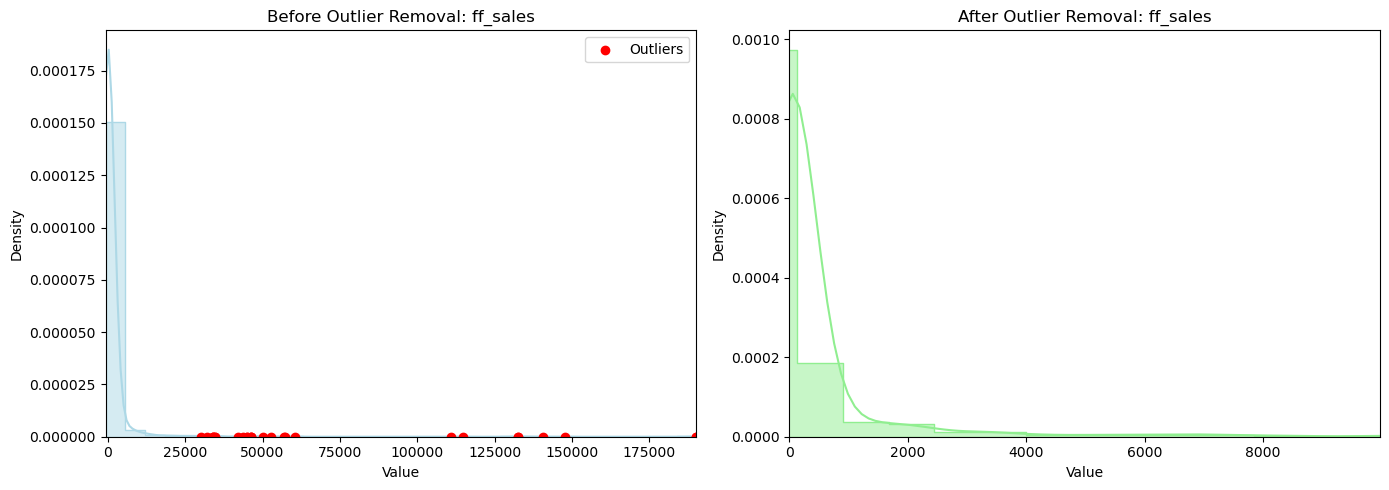

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('tab_data.csv')

# Function to plot data
def plot_data(df, column, df_cleaned):
    # Calculate z-scores for the column
    z_scores = np.abs(stats.zscore(df[column]))
    outliers = z_scores > 3

    # For numerical data, use histogram and scatter for outliers
    fig, ax = plt.subplots(1, 2, figsize=(14, 5))
    
    # Before cleaning - histogram with outliers marked
    sns.histplot(df[column], kde=True, element='step', stat='density', ax=ax[0], color='lightblue', bins=30)
    ax[0].scatter(df[column][outliers], np.zeros(sum(outliers)), color='red', zorder=2, label='Outliers')
    ax[0].set_title(f'Before Outlier Removal: {column}')
    ax[0].set_xlabel('Value')
    ax[0].set_ylabel('Density')
    ax[0].legend()
    
    # After cleaning - histogram
    sns.histplot(df_cleaned[column], kde=True, element='step', stat='density', ax=ax[1], color='lightgreen', bins=30)
    ax[1].set_title(f'After Outlier Removal: {column}')
    ax[1].set_xlabel('Value')
    ax[1].set_ylabel('Density')
    
    # Set x-axis limits based on the data range for better scaling
    ax[0].set_xlim(df[column].min(), df[column].max())
    ax[1].set_xlim(df_cleaned[column].quantile(0.01), df_cleaned[column].quantile(0.99))  # Zoom into the main distribution
    
    plt.tight_layout()
    plt.show()

# Identify numerical columns and handle outliers
numeric_cols = ['ff_assets_curr', 'ff_inven_turn', 'ff_curr_ratio', 'ff_debt', 'ff_invest_cf', 'ff_ltd_com_eq', 'ff_debt_eq', 'ff_oper_cf', 'ff_ebitda_oper', 'ff_roce', 'ff_sales']
df_cleaned = df.copy()  # Initialize df_cleaned

for column in numeric_cols:
    z_scores = np.abs(stats.zscore(df[column]))
    filter_outliers = z_scores < 3
    df_cleaned = df_cleaned[filter_outliers]
    plot_data(df, column, df_cleaned[filter_outliers])